In [ ]:
#Predicting Owner Type from dataset
#https://www.kaggle.com/competitions/titanic

#Standard Scaling (Z-Score Normalization)
#One-Hot Encoding



#Logistic Regression (Cubic + LASSO)
  # C (Regularization Strength)
  #max_iter
  #penalty (l1, l2, elasticnet, none)
  #solver (newton-cg, lbfgs, liblinear, sag, saga)
#SVM

#Neural Network (Linear + DropOut)
  #Epochs
  #Learning Rate
  #Loss
  #Validation Split
  #Activation Functions


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
import seaborn as sns


%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv')
df = df.dropna()
df_encoded = pd.get_dummies(df, columns=['Embarked', 'Sex'])
X = df_encoded.drop(['Survived', 'Ticket', 'Cabin', 'Name'], axis = 1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

# Plotting the clusters
columns = X_train.columns
print("Column names in the DataFrame:")
print(columns)
centers = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Column names in the DataFrame:
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')
Centroids of the clusters:
[[ 3.09921053e+02  1.15789474e+00  3.49078947e+01  5.78947368e-01
   6.31578947e-01  9.77554816e+01  4.21052632e-01  5.26315789e-02
   5.26315789e-01  6.31578947e-01  3.68421053e-01]
 [ 7.66550000e+02  1.22500000e+00  3.52000000e+01  3.50000000e-01
   3.75000000e-01  9.09965650e+01  2.50000000e-01 -6.93889390e-18
   7.50000000e-01  4.00000000e-01  6.00000000e-01]
 [ 5.33976190e+02  1.04761905e+00  3.81904762e+01  4.04761905e-01
   4.28571429e-01  6.16876024e+01  4.04761905e-01 -6.93889390e-18
   5.95238095e-01  4.28571429e-01  5.71428571e-01]
 [ 9.30769231e+01  1.42307692e+00  3.36538462e+01  5.76923077e-01
   5.00000000e-01  5.77485538e+01  1.53846154e-01  0.00000000e+00
   8.46153846e-01  4.61538462e-01  5.38461538e-01]]


In [ ]:
df = pd.read_csv('train.csv')
df = df.dropna()
df_encoded = pd.get_dummies(df, columns=['Embarked', 'Sex'])
X = df_encoded.drop(['Survived', 'Ticket', 'Cabin', 'Name'], axis = 1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Only transform the testing data
X_test_scaled = scaler.transform(X_test)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X_train_scaled)

# Select all rows that are outliers (where prediction is -1)
outliers = X_train_scaled[y_pred == -1]

print(len(X_train))
print(len(outliers))
print("Outliers detected by LOF:")
print(outliers)

146
15
Outliers detected by LOF:
[[-1.07652464  1.57123974 -2.12968204  0.8311051   0.66883168 -0.66351658
  -0.68901921 -0.11785113  0.71074232 -0.95971487  0.95971487]
 [ 1.17444578  3.51531603 -1.93435156 -0.72455317  0.66883168 -0.83476583
  -0.68901921 -0.11785113  0.71074232 -0.95971487  0.95971487]
 [ 1.02922188  3.51531603 -1.08791945 -0.72455317 -0.61602918 -0.89585844
  -0.68901921 -0.11785113  0.71074232 -0.95971487  0.95971487]
 [ 0.96467793  3.51531603  0.40961427 -0.72455317 -0.61602918 -0.89585844
  -0.68901921 -0.11785113  0.71074232 -0.95971487  0.95971487]
 [-0.48352706  1.57123974 -2.19479221  0.8311051   0.66883168 -0.66351658
  -0.68901921 -0.11785113  0.71074232 -0.95971487  0.95971487]
 [ 1.38017963 -0.37283655 -1.60880075  0.8311051   1.95369253  0.52668151
  -0.68901921 -0.11785113  0.71074232 -0.95971487  0.95971487]
 [-0.86675679 -0.37283655  0.5398346   2.38676338 -0.61602918  0.14683105
  -0.68901921  8.48528137 -1.40697969 -0.95971487  0.95971487]
 [-1.258

In [50]:
#Initating DataSet for LinearRegression w/ Exponential + Ridge Regression

df = pd.read_csv('train.csv')
df = df.dropna()
df_encoded = pd.get_dummies(df, columns=['Embarked', 'Sex'])
X = df_encoded.drop(['Survived', 'Ticket', 'Cabin', 'Name'], axis = 1)
y = df_encoded['Survived']


X = np.power(X, 2)


X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit and transform the training data
X_poly_train = scaler.fit_transform(X_poly_train)
# Only transform the testing data
X_poly_test = scaler.transform(X_poly_test)

scaler = StandardScaler()  # Assuming you have initialized a scaler
X_poly_train = scaler.fit_transform(X_poly_train)
# Only transform the testing data
X_poly_test = scaler.transform(X_poly_test)

# print("Training Set:")
# print(X_poly_train.head())
# print("\nValidation Set:")
# print(y_poly_train.head())



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              C  Training Acc  Validation Acc
0  1.000000e-07      0.773973        0.729730
1  1.000000e-05      0.773973        0.729730
2  1.000000e-03      0.773973        0.702703
3  1.000000e-02      0.767123        0.729730
4  1.000000e-01      0.746575        0.702703
5  1.000000e+00      0.746575        0.702703
6  1.000000e+01      0.746575        0.702703
7  1.000000e+02      0.739726        0.783784
8  1.000000e+04      0.520548        0.432432
9  1.000000e+06      0.760274        0.675676


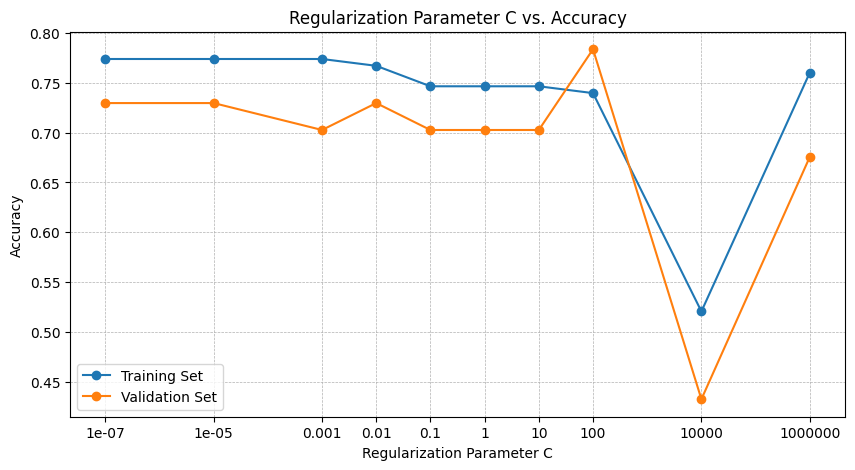

In [98]:
dropout_rates = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]
train_acc = []
validation_acc = []



for i in dropout_rates:
  svm_model = LinearSVC(
      C=i,  # Regularization parameter
      max_iter=1000  # Number of iterations to run the training algorithm
  )

  # Fit the model on the training data
  svm_model.fit(X_poly_train, y_poly_train)

  # Predict and evaluate on the training data
  y_train_pred = svm_model.predict(X_poly_train)
  train_accuracy = accuracy_score(y_poly_train, y_train_pred)
  train_acc.append(train_accuracy)

  # Predict and evaluate on the test data
  y_test_pred = svm_model.predict(X_poly_test)
  validation_accuracy = accuracy_score(y_poly_test, y_test_pred)
  validation_acc.append(validation_accuracy)

# Create a DataFrame to display results
df = pd.DataFrame({
    'C': dropout_rates,
    'Training Acc': train_acc,
    'Validation Acc': validation_acc
})

print(df)

# Plotting
plt.figure(figsize=(10, 5))
plt.semilogx(dropout_rates, train_acc, label='Training Set', marker='o')
plt.semilogx(dropout_rates, validation_acc, label='Validation Set', marker='o')
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
plt.xticks(dropout_rates, labels=[str(rate) for rate in dropout_rates])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.title('Regularization Parameter C vs. Accuracy')
plt.legend()
plt.show()

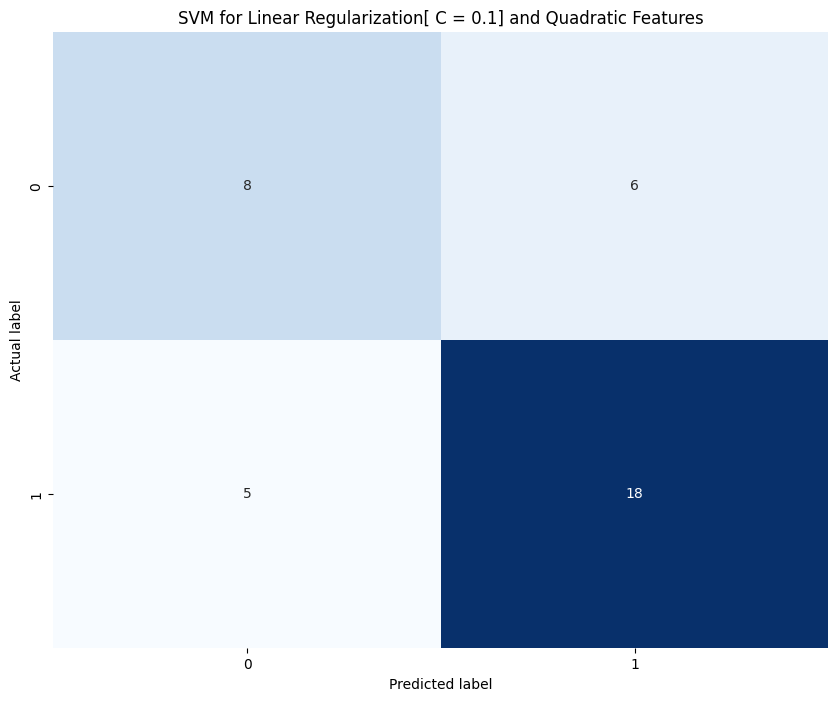

In [52]:
svm_model = LinearSVC(
    C=0.1,
    penalty='l2',
    max_iter=1000
)

# Fit the model on the training data
svm_model.fit(X_poly_train, y_poly_train)

# Predict and evaluate on the training data
y_train_pred = svm_model.predict(X_poly_train)
train_accuracy = accuracy_score(y_poly_train, y_train_pred)
train_acc.append(train_accuracy)

# Predict and evaluate on the test data
y_test_pred = svm_model.predict(X_poly_test)
validation_accuracy = accuracy_score(y_poly_test, y_test_pred)
validation_acc.append(validation_accuracy)

conf_mat = confusion_matrix(y_poly_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False)

# Add labels and title, adjust as needed
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('SVM for Linear Regularization[ C = 0.1] and Quadratic Features')
plt.show()

In [53]:
#Initating DataSet for Logstic Regression w/ Cubic + LASSO

df = pd.read_csv('train.csv')
df = df.dropna()
df_encoded = pd.get_dummies(df, columns=['Embarked', 'Sex'])
X = df_encoded.drop(['Survived', 'Ticket', 'Cabin', 'Name'], axis = 1)
y = df_encoded['Survived']


scaler = StandardScaler()

poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X)       # Fit and transform the data
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_poly_train = scaler.fit_transform(X_poly_train)
# Only transform the testing data
X_poly_test = scaler.transform(X_poly_test)

# print("Training Set:")
# print(X_poly_train.head())
# print("\nValidation Set:")
# print(y_poly_train.head())

              C  Training Acc  Validation Acc
0  1.000000e-07      0.315068        0.378378
1  1.000000e-05      0.315068        0.378378
2  1.000000e-03      0.315068        0.378378
3  1.000000e-02      0.315068        0.378378
4  1.000000e-01      0.780822        0.756757
5  1.000000e+00      0.835616        0.729730
6  1.000000e+01      0.890411        0.675676
7  1.000000e+02      0.869863        0.729730
8  1.000000e+04      0.890411        0.729730
9  1.000000e+06      0.890411        0.729730


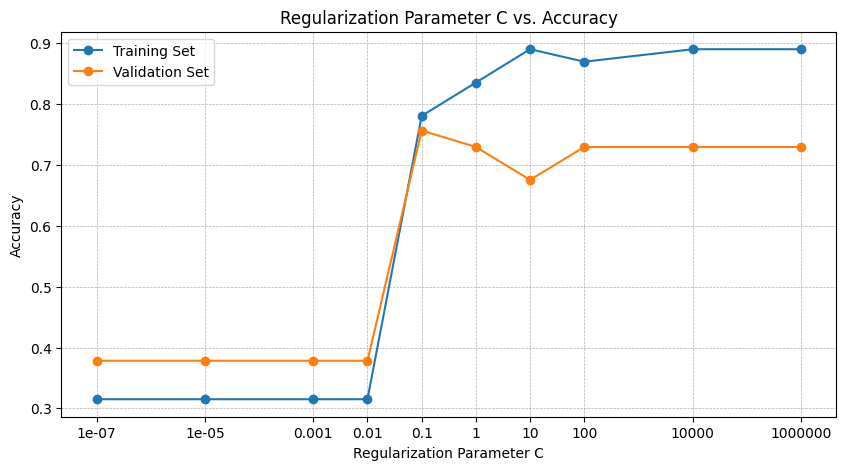

In [6]:


dropout_rates = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]
train_acc = []
validation_acc = []

for i in dropout_rates:
  # Fit and transform the training data
  X_poly_train = scaler.fit_transform(X_poly_train)
  # Only transform the testing data
  X_poly_test = scaler.transform(X_poly_test)


  #Parameters do LASSO, modify and document max_iter + class weight
  # log_reg = LogisticRegression(
  #     C = i,
  #     penalty='l2',
  #     solver='lbfgs',
  #     max_iter = 1000
  #     #class_weight='balanced'
  # )
  log_reg = LogisticRegression(
        C=i,
        penalty='l1',
        solver='liblinear',  # 'liblinear' is a good choice for small datasets and L1 penalty
        max_iter=1000  # You may want to increase max_iter if convergence is an issue
  )

  '''
  penalty: 'l2'
  dual: False
  tol: 0.0001
  C: 1.0
  fit_intercept: True
  intercept_scaling: 1
  class_weight: None
  random_state: None
  solver: 'lbfgs'
  max_iter: 100
  multi_class: 'auto'
  verbose: 0
  warm_start: False
  n_jobs: None
  l1_ratio: None
  '''

  # Fit the model on the training data
  log_reg.fit(X_poly_train, y_poly_train)

  # Predict on the test data
  y_pred = log_reg.predict(X_poly_train)

  # Evaluate the model
  accuracy = accuracy_score(y_poly_train, y_pred)
  conf_mat = confusion_matrix(y_poly_train, y_pred)
  #report = classification_report(y_poly_train, y_pred)

  #print("Test Accuracy:", accuracy)
  train_acc.append(accuracy)
  # print("Confusion Matrix:\n", conf_mat)
  # print("Classification Report:\n", report)

  # Predict on the test data
  y_pred = log_reg.predict(X_poly_test)

  # Evaluate the model
  accuracy = accuracy_score(y_poly_test, y_pred)
  validation_acc.append(accuracy)
  #print("Validation Accuracy:", accuracy)
  #print("Confusion Matrix:\n", conf_mat)


df = pd.DataFrame({
  'C': dropout_rates,
  'Training Acc': train_acc,
  'Validation Acc': validation_acc
})

print(df)

#graphing on logarithmic scale
plt.figure(figsize=(10, 5))
plt.semilogx(dropout_rates, train_acc, label='Training Set', marker='o')
plt.semilogx(dropout_rates, validation_acc, label='Validation Set', marker='o')
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xticks(dropout_rates, labels=[str(rate) for rate in dropout_rates])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.title('Regularization Parameter C vs. Accuracy')
plt.legend()
plt.show()



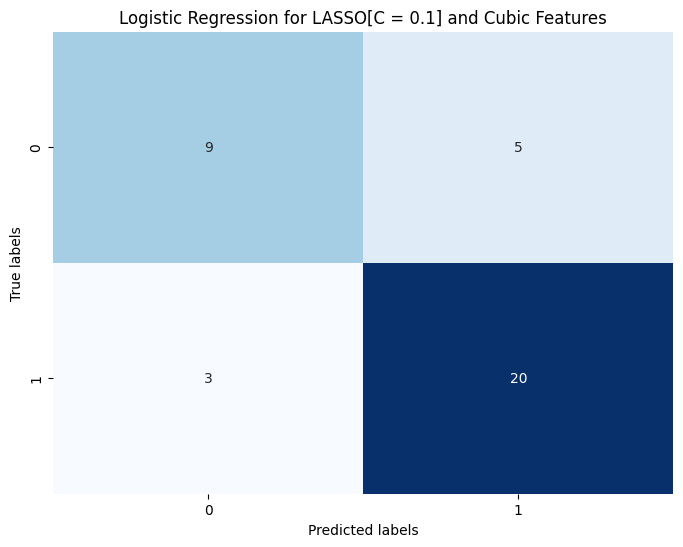

In [55]:



#Parameters do LASSO, modify and document max_iter + class weight
log_reg = LogisticRegression(
    C=0.1,
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)
# log_reg = LogisticRegression(
#       C=1000000,
#       penalty='l1',
#       solver='liblinear',
#       max_iter=1000
# )

'''
penalty: 'l2'
dual: False
tol: 0.0001
C: 1.0
fit_intercept: True
intercept_scaling: 1
class_weight: None
random_state: None
solver: 'lbfgs'
max_iter: 100
multi_class: 'auto'
verbose: 0
warm_start: False
n_jobs: None
l1_ratio: None
'''
# Fit the model on the training data
log_reg.fit(X_poly_train, y_poly_train)
y_test_pred = log_reg.predict(X_poly_test)
validation_accuracy = accuracy_score(y_poly_test, y_test_pred)

conf_mat = confusion_matrix(y_poly_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Logistic Regression for LASSO[C = 0.1] and Cubic Features')
plt.show()

In [56]:
#Initating DataSet for Neural Network w/ Linear + DropOut

df = pd.read_csv('train.csv') #Import CSV
df = df.dropna() #Drop row w/ NaN
df_encoded = pd.get_dummies(df, columns=['Embarked', 'Sex']) #Use One-Hot Encoding on DataFrame
X = df_encoded.drop(['Survived', 'Ticket', 'Cabin', 'Name'], axis = 1) #Drop certain features
y = df_encoded['Survived'] #define Y

poly = PolynomialFeatures(degree=2)  # Instantiate the transformer with degree 2

#Create
X_poly = poly.fit_transform(X)       # Fit and transform the data

#Split into training and validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()



# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Only transform the testing data
X_test_scaled = scaler.transform(X_test)


# print("Training Set:")
# print(X_train.head())
# print("\nValidation Set:")
# print(y_train.head())

   Dropout Rate  Training Accuracy  Validation Accuracy
0           0.0           0.719178             0.729730
1           0.1           0.684932             0.621622
2           0.2           0.684932             0.621622
3           0.3           0.684932             0.621622
4           0.4           0.684932             0.621622
5           0.5           0.684932             0.621622
6           0.6           0.684932             0.621622
7           0.7           0.684932             0.621622
8           0.8           0.684932             0.621622
9           0.9           0.684932             0.621622


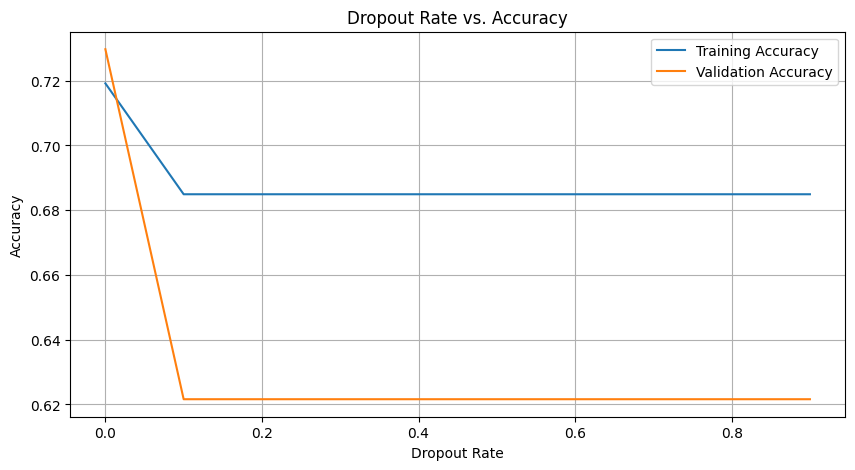

In [39]:
dropout_rates = [i / 10 for i in range(10)]
train_acc = []  # Use a list to store training accuracies
validation_acc = []  # Use a list to store validation accuracies

for i in dropout_rates:
  model = Sequential([
      Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dropout(i),
      Dense(64, activation='relu'),
      Dropout(i),
      Dense(32, activation='relu'),
      Dropout(i),
      Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

  # Evaluate the model and get the training accuracy
  train_results = model.evaluate(X_train_scaled, y_train, verbose=0)
  train_acc.append(train_results[1])

  # Evaluate the model and get the validation accuracy
  validation_results = model.evaluate(X_test_scaled, y_test, verbose=0)
  validation_acc.append(validation_results[1])

# Create a DataFrame to display results
df = pd.DataFrame({
  'Dropout Rate': dropout_rates,
  'Training Accuracy': train_acc,
  'Validation Accuracy': validation_acc
})

print(df)

plt.figure(figsize=(10, 5))
plt.plot(dropout_rates, train_acc, label='Training Accuracy')
plt.plot(dropout_rates, validation_acc, label='Validation Accuracy')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Dropout Rate vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2/2 [==============================] - 0s 6ms/step


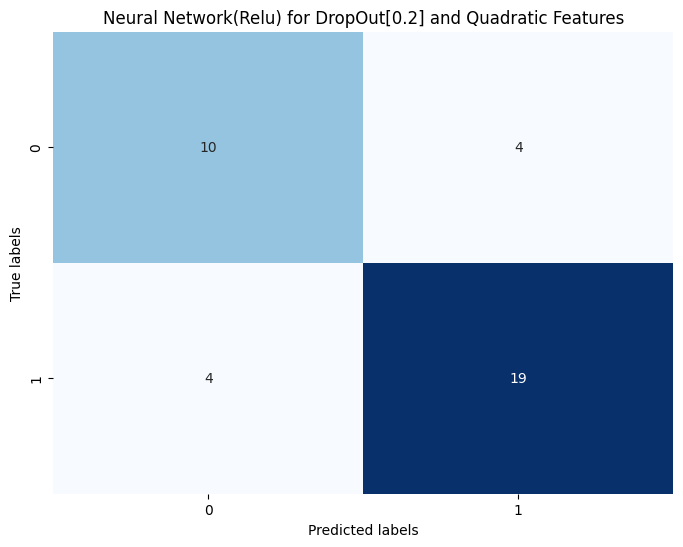

In [58]:
#Creating a confusion matrix for NN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Change to 'sigmoid' for binary classification
])


model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)
train_results = model.evaluate(X_train_scaled, y_train, verbose=0)
train_acc.append(train_results[1])
validation_results = model.evaluate(X_test_scaled, y_test, verbose=0)
validation_acc.append(validation_results[1])
y_test_pred_probs = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")
conf_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Neural Network(Relu) for DropOut[0.2] and Quadratic Features')
plt.show()